In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import cpi
import matplotlib.ticker as ticker

# setting plt to inline
%matplotlib inline

# updating cpi if flagged out of date
# cpi.update()

In [2]:
# importing sqlite3
import sqlite3

# conneting to db and creating cursor
conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

# creating query functions
def fetcha(q):
    return cur.execute(q).fetchall()
def fetcho(q):
    return cur.execute(q).fetchone()

In [3]:
# getting table names
q = """SELECT name FROM sqlite_master 
WHERE type IN ('table','view') 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1"""
fetcha(q)

[('bom_movie_gross',),
 ('imdb_name_basic',),
 ('imdb_name_basics',),
 ('imdb_title_akas',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('rotten_tomatoes_critic_reviews',),
 ('rotten_tomatoes_movies',),
 ('tmdb_movies',),
 ('tn_movie_budgets',)]

In [4]:
q = "PRAGMA table_info('rotten_tomatoes_movies')"
fetcha(q)

[(0, 'idx', 'INTEGER', 0, None, 1),
 (1, 'rotten_tomatoes_link', 'TEXT', 0, None, 0),
 (2, 'movie_title', 'TEXT', 0, None, 0),
 (3, 'movie_info', 'TEXT', 0, None, 0),
 (4, 'critics_consensus', 'TEXT', 0, None, 0),
 (5, 'content_rating', 'TEXT', 0, None, 0),
 (6, 'genres', 'TEXT', 0, None, 0),
 (7, 'directors', 'TEXT', 0, None, 0),
 (8, 'authors', 'TEXT', 0, None, 0),
 (9, 'actors', 'TEXT', 0, None, 0),
 (10, 'original_release_date', 'TEXT', 0, None, 0),
 (11, 'streaming_release_date', 'TEXT', 0, None, 0),
 (12, 'runtime', 'REAL', 0, None, 0),
 (13, 'production_company', 'TEXT', 0, None, 0),
 (14, 'tomatometer_status', 'TEXT', 0, None, 0),
 (15, 'tomatometer_rating', 'REAL', 0, None, 0),
 (16, 'tomatometer_count', 'REAL', 0, None, 0),
 (17, 'audience_status', 'TEXT', 0, None, 0),
 (18, 'audience_rating', 'REAL', 0, None, 0),
 (19, 'audience_count', 'REAL', 0, None, 0),
 (20, 'tomatometer_top_critics_count', 'INTEGER', 0, None, 0),
 (21, 'tomatometer_fresh_critics_count', 'INTEGER', 0, N

In [5]:
q = "PRAGMA table_info('tn_movie_budgets')"
fetcha(q)

[(0, 'idx', 'INTEGER', 0, None, 1),
 (1, 'id', 'INTEGER', 0, None, 0),
 (2, 'release_date', 'TEXT', 0, None, 0),
 (3, 'movie', 'TEXT', 0, None, 0),
 (4, 'production_budget', 'TEXT', 0, None, 0),
 (5, 'domestic_gross', 'TEXT', 0, None, 0),
 (6, 'worldwide_gross', 'TEXT', 0, None, 0)]

In [52]:
# creating initial dataframe by joining the four tables and printing first row
q = """SELECT*FROM rotten_tomatoes_movies AS rt
       JOIN tn_movie_budgets AS tn
       ON rt.movie_title = tn.movie
       
       """
dfr = pd.DataFrame(fetcha(q))
dfr.columns = [i[0] for i in cur.description]   

In [53]:
# # dropping extraneous columns
# df = df.drop(['idx', 'rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'directors',\
#              'authors', 'actors', 'original_release_date', 'streaming_release_date',\
#              'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating',\
#              'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count',\
#              'id', 'movie'], axis=1)
# df.head(1)

In [54]:
dfr.columns

Index(['idx', 'rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'idx', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [55]:
dfr.isna().sum()

idx                                   0
rotten_tomatoes_link                  0
movie_title                           0
movie_info                           35
critics_consensus                   642
content_rating                        0
genres                                0
directors                            52
authors                             119
actors                               14
original_release_date                64
streaming_release_date               38
runtime                              35
production_company                   17
tomatometer_status                    3
tomatometer_rating                    3
tomatometer_count                     3
audience_status                      31
audience_rating                      12
audience_count                       13
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
idx                                   0
id                                    0


In [56]:
# changing actor name NaNs to strings
dfr['actors'] = dfr['actors'].fillna('NaN')

In [57]:
# change date string to datetime object 
dfr.release_date = pd.to_datetime(dfr.release_date)
dfr['year'] = dfr['release_date'].apply(lambda x: x.year)
dfr['month'] = dfr['release_date'].apply(lambda x: x.month)

In [58]:
#cleaning numerical strings and converting to floats
dfr['worldwide_gross'] = dfr['worldwide_gross']\
                                           .apply(lambda x: x.strip("$")\
                                           .replace(',', '')).astype('float')
dfr['domestic_gross'] = dfr['domestic_gross']\
                                           .apply(lambda x: x.strip("$")\
                                           .replace(',', '')).astype('float')
dfr['production_budget'] = dfr['production_budget']\
                                             .apply(lambda x: x.strip("$")\
                                             .replace(',', '')).astype('float')

In [59]:
# adding intl gross column
dfr['international_gross'] = dfr['worldwide_gross'].sub(dfr['domestic_gross'])

In [60]:
# adding net profit columns
dfr['domestic_net'] = dfr['domestic_gross'].sub(dfr['production_budget'])
dfr['worldwide_net'] = dfr['worldwide_gross'].sub(dfr['production_budget'])
dfr['international_net'] = dfr['international_gross'].sub(dfr['production_budget'])

In [61]:
# adding roi columns
dfr['domestic_roi'] = dfr['domestic_net'].divide(dfr['production_budget'])
dfr['worldwide_roi'] = dfr['worldwide_net'].divide(dfr['production_budget'])
dfr['international_roi'] = dfr['international_net'].divide(dfr['production_budget'])

In [62]:
dfr#adding adjust gross profit and budget columns
dfr['adj_dom_gross'] = dfr.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)
dfr['adj_ww_gross'] = dfr.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)
dfr['adj_i_gross'] = dfr.apply(lambda x: cpi.inflate(x.international_gross, x.year), axis=1)
dfr['adj_prod_budg'] = dfr.apply(lambda x: cpi.inflate(x.production_budget, x.year), axis=1)

In [63]:
#adding net profit columns
dfr['adj_dom_net'] = dfr['adj_dom_gross'].sub(dfr['adj_prod_budg'])
dfr['adj_ww_net'] = dfr['adj_ww_gross'].sub(dfr['adj_prod_budg'])
dfr['adj_i_net'] = dfr['adj_i_gross'].sub(dfr['adj_prod_budg'])

In [64]:
#adding adjusted return on investment columns and checking results
dfr['adj_dom_roi'] = dfr['adj_dom_net'].divide(dfr['adj_prod_budg'])
dfr['adj_ww_roi'] = dfr['adj_ww_net'].divide(dfr['adj_prod_budg'])
dfr['adj_i_roi'] = dfr['adj_i_net'].divide(dfr['adj_prod_budg'])
dfr.head(1)

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,adj_dom_gross,adj_ww_gross,adj_i_gross,adj_prod_budg,adj_dom_net,adj_ww_net,adj_i_net,adj_dom_roi,adj_ww_roi,adj_i_roi
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,1.040753e+08,2.615132e+08,1.574379e+08,1.113815e+08,-7.306274e+06,1.501316e+08,4.605635e+07,-0.065597,1.347904,0.413501


In [65]:
# checking column names
dfr.columns

Index(['idx', 'rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'idx', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'year', 'month',
       'international_gross', 'domestic_net', 'worldwide_net',
       'international_net', 'domestic_roi', 'worldwide_roi',
       'international_roi', 'adj_dom_gross', 'adj_ww_gross', 'adj_i_gross',
       'adj_prod_budg', 'adj_dom_net', 'adj_ww_net', 'adj_i_net',
       'adj_dom_roi', 'adj_ww_roi', 'adj_i_roi'],
      dtype='object')

In [66]:
# renaming columns
dfr = dfr.rename(columns = {'movie_title':'title', 'release_date':'date',\
                          'content_rating': 'rating', 'genres': 'genres',\
                          'tomatometer_top_critics_count': 'top', 'tomatometer_fresh_critics_count': 'fresh',\
                          'tomatometer_rotten_critics_count': 'rotten'})
dfr.columns

Index(['idx', 'rotten_tomatoes_link', 'title', 'movie_info',
       'critics_consensus', 'rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'top', 'fresh', 'rotten', 'idx', 'id', 'date',
       'movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'year', 'month', 'international_gross', 'domestic_net', 'worldwide_net',
       'international_net', 'domestic_roi', 'worldwide_roi',
       'international_roi', 'adj_dom_gross', 'adj_ww_gross', 'adj_i_gross',
       'adj_prod_budg', 'adj_dom_net', 'adj_ww_net', 'adj_i_net',
       'adj_dom_roi', 'adj_ww_roi', 'adj_i_roi'],
      dtype='object')

## Top 100 Films by Worldwide Gross

In [21]:
# creating dataframes sorted by gross
title_gross = dfr[['title', 'production_budget', 'worldwide_gross', 'worldwide_net', 'worldwide_roi', 'genres', 'year', 'month']]
unique_gross_titles = title_gross.drop_duplicates(subset = ['title'])
top100_gross_films = unique_gross_titles.sort_values(by='worldwide_gross', ascending=False).head(100)
top20_gross_films = unique_gross_titles.sort_values(by='worldwide_gross', ascending=False).head(20)

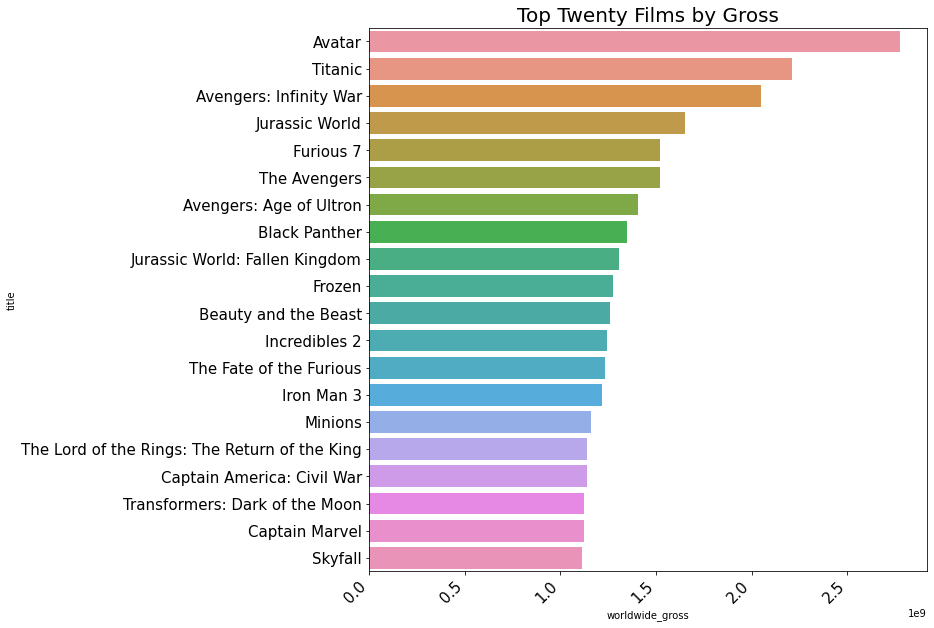

In [67]:
# plotting top 20 films by gross
fig, ax=plt.subplots(figsize=(10, 10))
sns.barplot(x='worldwide_gross', y='title', data= top20_gross_films)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45, ha='right')
ax.set_title('Top Twenty Films by Gross', size = 20)
plt.show()

|Budget Stat       |Dollar Amount      |
|:-----------------|------------------:|
|Mean Budget       |       168,575,000 |
|Median Budget     |       172,500,000 |
|Min Budget        |        35,000,000 |
|Max Budget        |        425,000,000|

In [89]:
# creating dataframes sorted by adjusted gross
title_adj_gross = dfr[['title', 'adj_prod_budg', 'adj_ww_gross', 'adj_ww_net', 'adj_ww_roi', 'genres', 'year', 'month']]
unique_adj_titles = title_adj_gross.drop_duplicates(subset = ['title'])
top100_adj_gross_films = unique_adj_titles.sort_values(by='adj_ww_gross', ascending=False).head(100)
top20_adj_gross_films = unique_adj_titles.sort_values(by='adj_ww_gross', ascending=False).head(20)

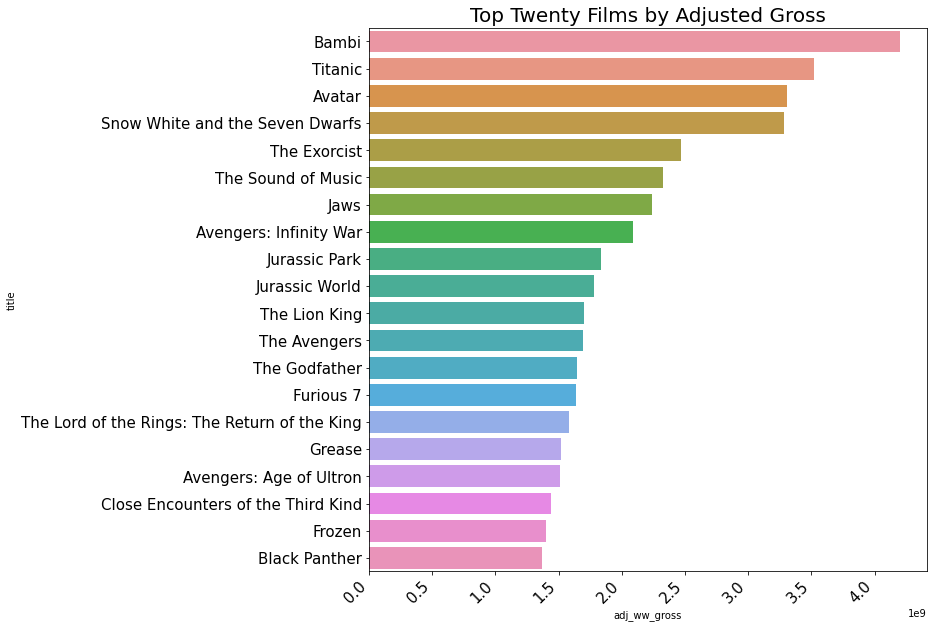

In [70]:
fig, ax=plt.subplots(figsize=(10, 10))
sns.barplot(x='adj_ww_gross', y='title', data= top20_adj_gross_films)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45, ha='right')
ax.set_title('Top Twenty Films by Adjusted Gross', size = 20)
plt.show()

In [92]:
# top 100 by gross basic stats

print(f'mean {top100_gross_films.production_budget.mean()}')
print(f'median {top100_gross_films.production_budget.median()}')
print(f'min {top100_gross_films.production_budget.min()}')
print(f'max {top100_gross_films.production_budget.max()}')
top100_gross_films.describe()

mean 168575000.0
median 172500000.0
min 35000000.0
max 425000000.0


,production_budget,worldwide_gross,worldwide_net,worldwide_roi,year,month
count,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,1.685750e+08,9.576570e+08,7.890820e+08,5.846388,2011.340000,7.250000
std,7.397127e+07,3.273300e+08,3.019174e+08,3.688244,6.067333,2.903759
min,3.500000e+07,6.522201e+08,3.559452e+08,1.186484,1993.000000,2.000000
25%,1.100000e+08,7.578371e+08,6.014434e+08,3.236404,2009.000000,5.000000
50%,1.725000e+08,8.794230e+08,7.003720e+08,4.513429,2013.000000,6.000000
75%,2.000000e+08,1.040525e+09,8.783895e+08,7.029846,2016.000000,11.000000
max,4.250000e+08,2.776345e+09,2.351345e+09,18.927371,2019.000000,12.000000


In [94]:
# top 100 by adj gross basic stats
print(f'mean {top100_adj_gross_films.adj_prod_budg.mean()}')
print(f'median {top100_adj_gross_films.adj_prod_budg.median()}')
print(f'min {top100_adj_gross_films.adj_prod_budg.min()}')
print(f'max {top100_adj_gross_films.adj_prod_budg.max()}')
top100_adj_gross_films.describe()

mean 168748084.47432208
median 179232282.51574492
min 4493093.145869947
max 506459142.2458597


,adj_prod_budg,adj_ww_gross,adj_ww_net,adj_ww_roi,year,month
count,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,1.687481e+08,1.277631e+09,1.108883e+09,16.019202,2001.810000,7.580000
std,9.581017e+07,5.732113e+08,5.769721e+08,39.681137,17.395399,3.012365
min,4.493093e+06,8.547247e+08,6.252047e+08,1.546673,1937.000000,2.000000
25%,8.805160e+07,9.490569e+08,8.062123e+08,4.006988,1994.000000,5.000000
50%,1.792323e+08,1.115988e+09,9.634766e+08,5.697061,2008.500000,7.000000
75%,2.201631e+08,1.304167e+09,1.156453e+09,11.970308,2015.000000,11.000000
max,5.064591e+08,4.203440e+09,4.189983e+09,311.354312,2019.000000,12.000000


In [80]:
top100_adj_gross_films[top100_adj_gross_films['adj_prod_budg'] == top100_adj_gross_films['adj_prod_budg'].min()]

,title,adj_prod_budg,adj_ww_gross,adj_ww_net,adj_ww_roi,genres,year,month
270,Rocky,4.493093e+06,1.010946e+09,1.006453e+09,224.0,"Drama, Sports & Fitness",1976,11


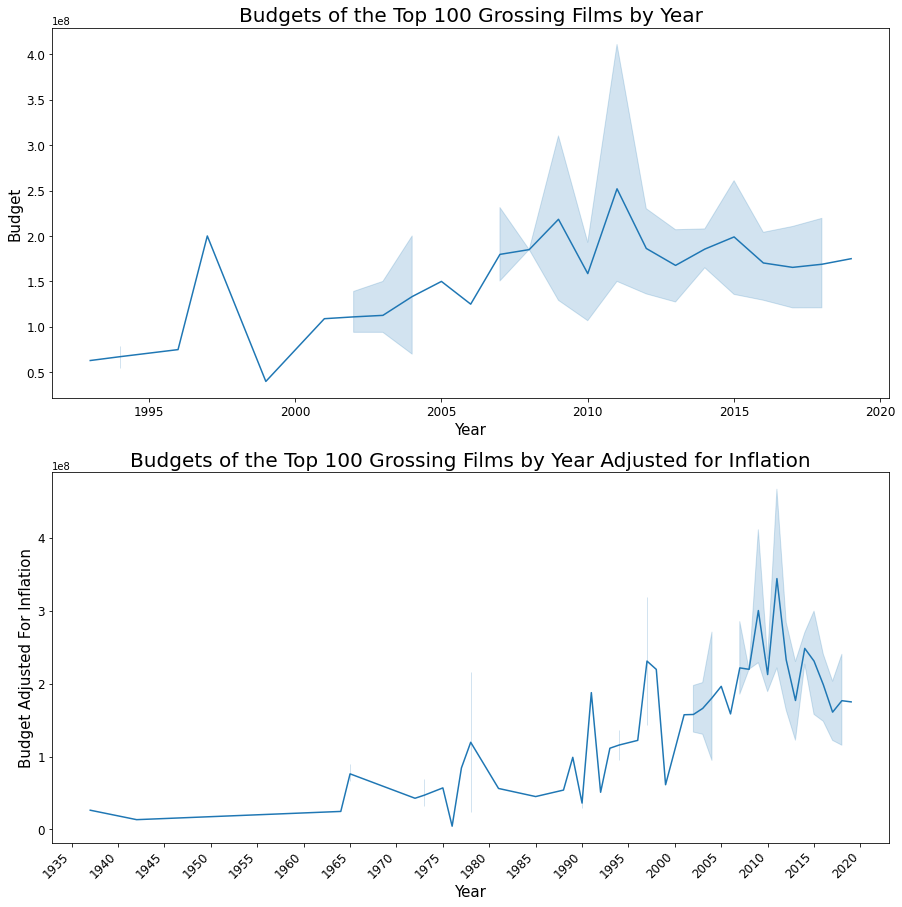

In [27]:
fig, (ax1, ax2 ) = plt.subplots(2, 1, figsize=(15,15))
sns.lineplot(x='year', y='production_budget', data=top100_gross_films, ax=ax1)
sns.lineplot(x='year', y='adj_prod_budg', data=top100_adj_gross_films, ax=ax2)
# adjusting xticks
plt.xticks(rotation=45, ha='right')
ax1.tick_params(labelsize=12) 
ax2.tick_params(labelsize=12)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())

# label for x-axis 
ax1.set_xlabel( "Year", size = 15 )
ax2.set_xlabel( "Year", size = 15 ) 
# label for y-axis 
ax1.set_ylabel( "Budget", size = 15 ) 
ax2.set_ylabel( "Budget Adjusted For Inflation", size = 15 ) 
# title for plot 
ax1.set_title( "Budgets of the Top 100 Grossing Films by Year" , size = 20 )
ax2.set_title( "Budgets of the Top 100 Grossing Films by Year Adjusted for Inflation" , size = 20 ) 
plt.show()

In [28]:
t100_count_by_year = pd.DataFrame(top100_gross_films.year.value_counts()).reset_index()
t100_count_by_year = t100_count_by_year.rename(columns= {'index': 'year', 'year': 'count'})
t100_count_by_year.head(1)

,year,count
0,2017,11


In [29]:
t100_adj_count_by_year = pd.DataFrame(top100_adj_gross_films.year.value_counts()).reset_index()
t100_adj_count_by_year = t100_adj_count_by_year.rename(columns= {'index': 'year', 'year': 'count'})
t100_adj_count_by_year.head(1)

,year,count
0,2017,7


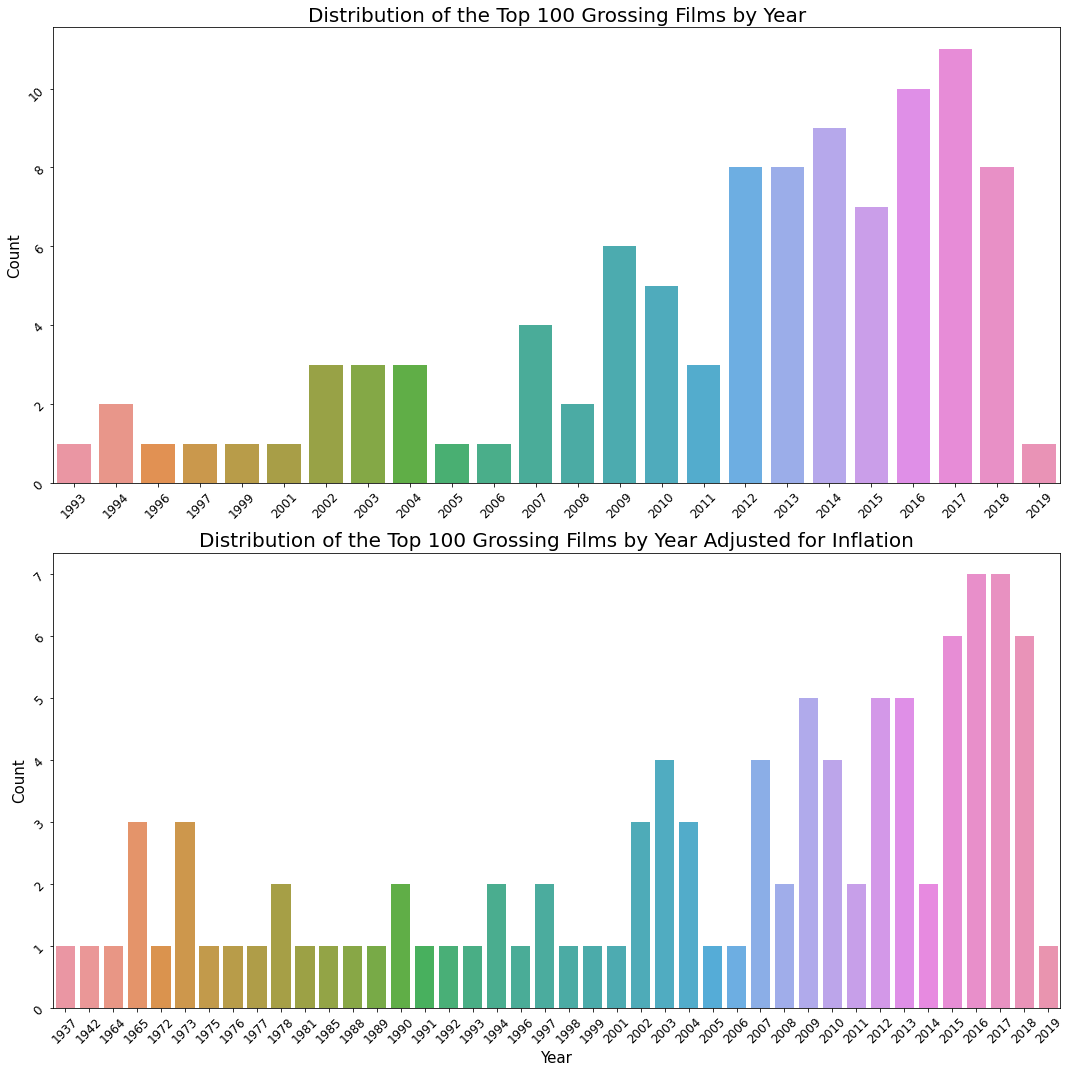

In [30]:
fig, (ax1, ax2 ) = plt.subplots(2, 1, figsize=(15,15))
sns.barplot(x='year', y= 'count', data=t100_count_by_year, ax = ax1)
sns.barplot(x='year', y= 'count', data=t100_adj_count_by_year, ax = ax2)
# adjusting xticks
for ax in fig.axes:
    ax.tick_params(labelrotation=45)
ax1.tick_params(labelsize=12) 
ax2.tick_params(labelsize=12)
# label for x-axis 
ax1.set_xlabel( "", size = 15 )
ax2.set_xlabel( "Year", size = 15 ) 
# label for y-axis 
ax1.set_ylabel( "Count", size = 15 ) 
ax2.set_ylabel( "Count", size = 15 ) 
# title for plot 
ax1.set_title( "Distribution of the Top 100 Grossing Films by Year" , size = 20 )
ax2.set_title( "Distribution of the Top 100 Grossing Films by Year Adjusted for Inflation" , size = 20 )
plt.tight_layout()
# render
plt.show()

In [31]:
t100_gross_by_roi = top100_gross_films.sort_values(by='worldwide_roi', ascending=False)
t100_gross_by_roi.head()

,title,production_budget,worldwide_gross,worldwide_net,worldwide_roi,genres,year,month
198,It,35000000.0,6.974580e+08,6.624580e+08,18.927371,"Classics, Comedy, Drama, Romance",2017,9
3711,The Sixth Sense,40000000.0,6.728063e+08,6.328063e+08,15.820157,Mystery & Suspense,1999,8
2529,Jurassic Park,63000000.0,1.038813e+09,9.758126e+08,15.489089,"Action & Adventure, Mystery & Suspense, Scienc...",1993,6
1226,Bohemian Rhapsody,55000000.0,8.949853e+08,8.399853e+08,15.272461,Drama,2018,11
2929,Minions,74000000.0,1.160336e+09,1.086336e+09,14.680219,"Animation, Comedy, Kids & Family",2015,7


In [32]:
t100_adj_gross_by_roi = top100_adj_gross_films.sort_values(by='adj_ww_roi', ascending=False)
t100_adj_gross_by_roi.head()

,title,adj_prod_budg,adj_ww_gross,adj_ww_net,adj_ww_roi,genres,year,month
1054,Bambi,1.345728e+07,4.203440e+09,4.189983e+09,311.354312,"Animation, Classics, Kids & Family, Science Fi...",1942,8
270,Rocky,4.493093e+06,1.010946e+09,1.006453e+09,224.000000,"Drama, Sports & Fitness",1976,11
357,Snow White and the Seven Dwarfs,2.641789e+07,3.283159e+09,3.256741e+09,123.277880,"Animation, Classics, Kids & Family, Science Fi...",1937,12
2114,Grease,2.352672e+07,1.519474e+09,1.495947e+09,63.585030,"Comedy, Musical & Performing Arts, Romance",1978,6
2090,Goldfinger,2.474100e+07,1.030050e+09,1.005309e+09,40.633333,"Action & Adventure, Classics, Mystery & Suspense",1964,12


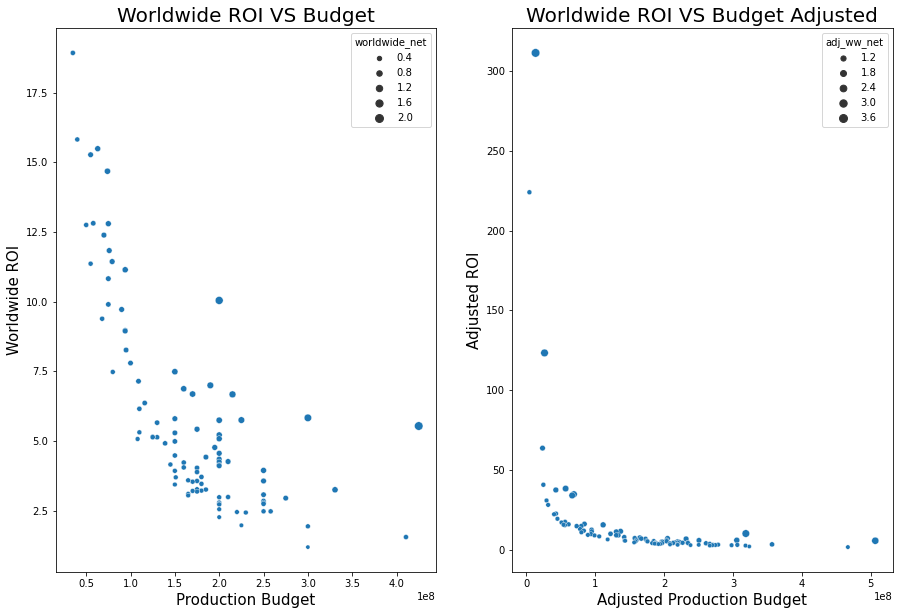

In [33]:
fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(15,10))

sns.scatterplot(x='production_budget', y='worldwide_roi', data=top100_gross_films, size='worldwide_net', ax=ax1)

sns.scatterplot(x='adj_prod_budg', y='adj_ww_roi', data=top100_adj_gross_films, size='adj_ww_net', ax=ax2)

#label for x-axis 
ax1.set_xlabel( "Production Budget" , fontsize=15 )
ax2.set_xlabel("Adjusted Production Budget", fontsize=15)
#label for y-axis 
ax1.set_ylabel( "Worldwide ROI", fontsize=15)
ax2.set_ylabel("Adjusted ROI", fontsize=15)
# setting title
ax1.set_title("Worldwide ROI VS Budget", fontsize=20)
ax2.set_title("Worldwide ROI VS Budget Adjusted", fontsize=20)
plt.show()

In [34]:
title_net = dfr[['title','adj_prod_budg', 'adj_ww_gross', 'adj_ww_net', 'year']]
unique_titles = title_net.groupby('title').first().reset_index()
top100_net_films = unique_titles.sort_values(by='adj_ww_net', ascending=False).head(100)
top100_net_films

,title,adj_prod_budg,adj_ww_gross,adj_ww_net,year
352,Bambi,1.345728e+07,4.203440e+09,4.189983e+09,1942
2795,Snow White and the Seven Dwarfs,2.641789e+07,3.283159e+09,3.256741e+09,1937
3920,Titanic,3.185757e+08,3.517408e+09,3.198832e+09,1997
321,Avatar,5.064591e+08,3.308483e+09,2.802024e+09,2009
3241,The Exorcist,6.909649e+07,2.465676e+09,2.396580e+09,1973
...,...,...,...,...,...
3958,Transformers: Revenge of the Fallen,2.502504e+08,9.968542e+08,7.466038e+08,2009
769,Crocodile Dundee,2.052720e+07,7.655796e+08,7.450524e+08,1986
420,Beverly Hills Cop,3.690910e+07,7.782898e+08,7.413807e+08,1984
1648,Jaws 2,7.842239e+07,8.191234e+08,7.407010e+08,1978


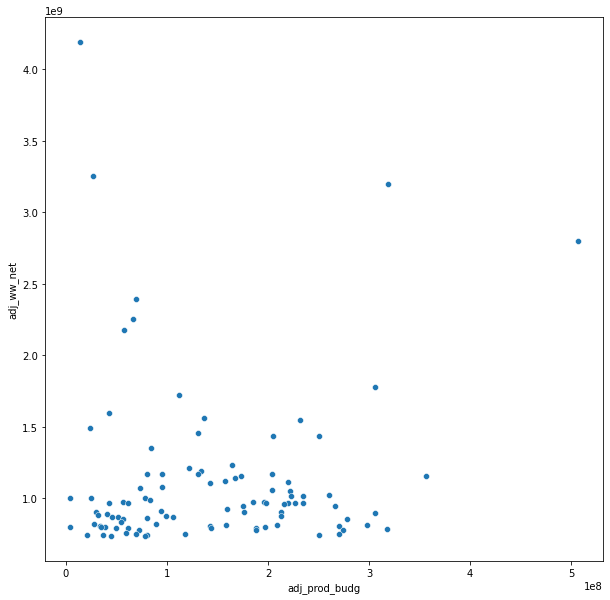

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(data=top100_net_films, x="adj_prod_budg", y="adj_ww_net")
plt.show()

In [36]:
title_roi = dfr[['title','adj_prod_budg', 'adj_ww_gross', 'adj_ww_roi', 'year']]
unique_titles = title_roi.groupby('title').first().reset_index()
top20_roi_films = unique_titles.sort_values(by='adj_ww_roi', ascending=False).head(20)
top20_roi_films

,title,adj_prod_budg,adj_ww_gross,adj_ww_roi,year
1909,Mad Max,6.205267e+05,3.094877e+08,497.750000,1980
2303,Paranormal Activity,5.362509e+05,2.314018e+08,430.517853,2009
3294,The Gallows,1.078644e+05,4.493251e+07,415.564740,2015
3090,The Blair Witch Project,9.207335e+05,3.810302e+08,412.833333,1999
2936,Super Size Me,8.797091e+04,3.009121e+07,341.058585,2004
352,Bambi,1.345728e+07,4.203440e+09,311.354312,1942
996,El Mariachi,1.238477e+04,3.612686e+06,290.704000,1993
2557,Rocky,4.493093e+06,1.010946e+09,224.000000,1976
3129,The Brothers McMullen,8.387697e+04,1.749087e+07,207.530120,1995
3797,The Texas Chainsaw Massacre,7.260037e+05,1.377978e+08,188.803136,1974


In [37]:
a_g = dfr[['title', 'actors', 'genres']]
a_g

,title,actors,genres
0,Percy Jackson & the Olympians: The Lightning T...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...","Action & Adventure, Comedy, Drama, Science Fic..."
1,Please Give,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Comedy
2,"10,000 B.C.","Steven Strait, Camilla Belle, Cliff Curtis, Jo...","Action & Adventure, Classics, Drama"
3,3:10 to Yuma,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...","Classics, Drama, Western"
4,Dark Water,"Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...","Art House & International, Horror, Mystery & S..."
...,...,...,...
4771,Zoolander,"Ben Stiller, Owen Wilson, Will Ferrell, Christ...","Comedy, Special Interest"
4772,Zoolander 2,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Comedy
4773,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...","Action & Adventure, Comedy, Kids & Family"
4774,Zootopia,"J.K. Simmons, Kristen Bell, Octavia Spencer, A...","Action & Adventure, Animation, Comedy"


In [38]:
dfr[dfr.title == 'Titanic']

,idx,rotten_tomatoes_link,title,movie_info,critics_consensus,rating,genres,directors,authors,actors,...,adj_dom_gross,adj_ww_gross,adj_i_gross,adj_prod_budg,adj_dom_net,adj_ww_net,adj_i_net,adj_dom_roi,adj_ww_roi,adj_i_roi
367,1017,m/1056130-titanic,Titanic,"Stuck in an unloving marriage, rich socialite ...",None,NR,"Action & Adventure, Classics, Drama, Romance",Jean Negulesco,"Charles Brackett, Walter Reisch, Richard L. Breen","Clifton Webb, Barbara Stanwyck, Robert Wagner,...",...,1.050287e+09,3.517408e+09,2.467121e+09,3.185757e+08,7.317110e+08,3.198832e+09,2.148545e+09,2.29682,10.041042,6.744222
4407,16297,m/titanic,Titanic,"James Cameron's ""Titanic"" is an epic, action-p...",A mostly unqualified triumph for James Cameron...,PG-13,"Drama, Romance",James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",...,1.050287e+09,3.517408e+09,2.467121e+09,3.185757e+08,7.317110e+08,3.198832e+09,2.148545e+09,2.29682,10.041042,6.744222


In [39]:
leo_adj_gross = dfr[dfr['actors'].str.contains('Leonardo DiCaprio')].adj_ww_gross.sum()
leo_adj_gross

8549676140.516123

In [40]:
# split_list = []
# for actor in df.actors:
#     split_list += actor.split(',')
    
# actors = list(set(split_list))

actor_list = ['Robert Downey Jr.',
 'Dwayne Johnson',
 'Chris Evans',
 'Chris Hemsworth',
 'Mark Ruffalo',
 'Johnny Depp',
 'Chris Pratt',
 'Vin Diesel',
 'Jason Statham',
 'Samuel L. Jackson',
 'Mark Wahlberg',
 'Liam Hemsworth',
 'Tom Hardy',
 'Ian McKellen',
 'Josh Hutcherson',
 'Steve Carell',
 'Will Smith',
 'Ryan Reynolds',
 'Michael Keaton',
 'Woody Harrelson',
 'Leonardo DiCaprio',
 'Kevin Hart',
 'Martin Freeman',
 'Liam Neeson',
 'Hugh Jackman',
 'Andy Serkis',
 'Richard Armitage',
 'Bradley Cooper',
 'Jesse Eisenberg',
 'Idris Elba',
 'Channing Tatum',
 'Matt Damon',
 'Chiwetel Ejiofor',
 'Gary Oldman',
 'Daniel Craig',
 'Bryan Cranston',
 'Chris Pine',
 'James McAvoy',
 'Seth Rogen',
 'Owen Wilson',
 'Tom Hiddleston',
 'Jeremy Renner',
 'Kevin James',
 'Jack Black',
 'Christoph Waltz',
 'Tom Hanks',
 'Ken Watanabe',
 'Tom Cruise',
 'Adam Sandler',
 'Ben Affleck',
 'Ralph Fiennes',
 'Ben Kingsley',
 'Jamie Foxx',
 'Michael B. Jordan',
 'Matthew McConaughey',
 'Paul Walker',
 'Javier Bardem',
 'Ben Mendelsohn',
 'Michael Fassbender',
 'Don Cheadle',
 'Willem Dafoe',
 'Gerard Butler',
 'Jason Momoa',
 'Josh Brolin',
 'Jude Law',
 'Josh Duhamel',
 'Will Arnett',
 'Stanley Tucci',
 'Christian Bale',
 'Russell Crowe',
 'Jason Bateman',
 'Antonio Banderas',
 'Ben Stiller',
 'Geoffrey Rush',
 'Jay Baruchel',
 'Donald Glover',
 'Andrew Garfield',
 'Benjamin Bratt',
 'Ian McShane',
 'Anthony Hopkins',
 'Jonah Hill',
 'Benedict Cumberbatch',
 'Donnie Yen',
 'T.J. Miller',
 'Eddie Redmayne',
 'Henry Cavill',
 'James Earl Jones',
 'Josh Gad',
 'Brad Pitt',
 'Ty Simpkins',
 'Zach Galifianakis',
 'John Goodman',
 'Jon Hamm',
 'Patrick Wilson',
 'Joseph Gordon-Levitt',
 'Morgan Freeman',
 'Irrfan Khan',
 'Marwan Kenzari',
 'Neil Patrick Harris',
 'Robert De Niro']

gross = []
for name in actor_list:
    value = dfr[dfr['actors'].str.contains(name)].adj_ww_gross.sum()
    gross.append(value)
    
    
gross[:5]


[11347372028.952734,
 10805639553.785833,
 8573423129.69062,
 7718332727.016749,
 7046639100.414162]

In [41]:
dict = {'Actor': actor_list, 'Gross': gross}
gross_df = pd.DataFrame(dict)
top20_actors = gross_df.sort_values(by='Gross', ascending=False).head(20)
top20_actors

,Actor,Gross
9,Samuel L. Jackson,1.942438e+10
13,Ian McKellen,1.386912e+10
45,Tom Hanks,1.327989e+10
25,Andy Serkis,1.271168e+10
67,Stanley Tucci,1.179104e+10
29,Idris Elba,1.149784e+10
95,Morgan Freeman,1.147837e+10
0,Robert Downey Jr.,1.134737e+10
47,Tom Cruise,1.095744e+10
59,Don Cheadle,1.091139e+10


In [42]:
split_list = []
for actor in dfr.actors:
    split_list += actor.split(',')
    
actors = list(set(split_list))
actors[:5]

collected = []
for actor in actors:
    actor = actor.strip()
    collected.append(actor)
collected[:5]

['Rebecca Fleming',
 'Michael Graham Cox',
 'Charles C. Winchester III',
 'Gary Mack',
 'Mark Salling']

In [43]:
split_list = []
for genre in dfr.genres:
    split_list += genre.split(',')

raw_genres = list(set(split_list))
raw_genres

['Romance',
 ' Gay & Lesbian',
 'Action & Adventure',
 'Art House & International',
 ' Comedy',
 'Comedy',
 ' Sports & Fitness',
 ' Classics',
 'Kids & Family',
 'Classics',
 ' Documentary',
 'Animation',
 'Horror',
 ' Art House & International',
 'Documentary',
 'Musical & Performing Arts',
 ' Faith & Spirituality',
 'Mystery & Suspense',
 ' Science Fiction & Fantasy',
 ' Anime & Manga',
 'Western',
 ' Special Interest',
 ' Mystery & Suspense',
 'Drama',
 'Science Fiction & Fantasy',
 ' Horror',
 'Cult Movies',
 ' Musical & Performing Arts',
 ' Western',
 ' Animation',
 ' Cult Movies',
 ' Drama',
 ' Romance',
 ' Kids & Family',
 ' Television']

In [45]:
split_list = []
for genre in dfr.genres:
    split_list += [g.strip().lower() for g in genre.split(',')]
    
genres = list(set(split_list))
genres

['comedy',
 'animation',
 'faith & spirituality',
 'western',
 'cult movies',
 'mystery & suspense',
 'classics',
 'science fiction & fantasy',
 'special interest',
 'romance',
 'kids & family',
 'documentary',
 'gay & lesbian',
 'drama',
 'horror',
 'art house & international',
 'musical & performing arts',
 'action & adventure',
 'sports & fitness',
 'television',
 'anime & manga']

In [46]:
len(genres)

21

In [47]:
action = dfr[(dfr['genres'] == 'Action & Adventure')]
unique_titles = action.groupby('title').first().reset_index()
top100_action = unique_titles.sort_values(by='adj_ww_net', ascending=False)
top100_action

,title,idx,rotten_tomatoes_link,movie_info,critics_consensus,rating,genres,directors,authors,actors,...,adj_dom_gross,adj_ww_gross,adj_i_gross,adj_prod_budg,adj_dom_net,adj_ww_net,adj_i_net,adj_dom_roi,adj_ww_roi,adj_i_roi
60,The Avengers,1197,m/1083461-avengers,A charismatic evil genius named Sir August de ...,"A TV spinoff that lacks enough energy to spin,...",PG-13,Action & Adventure,Jeremiah S. Chechik,Don MacPherson,"Ralph Fiennes, Uma Thurman, Sean Connery, Eile...",...,6.940329e+08,1.690249e+09,9.962157e+08,2.505415e+08,4.434914e+08,1.439707e+09,7.456742e+08,1.770131,5.746382,2.976250
48,Raiders of the Lost Ark,12247,m/raiders_of_the_lost_ark,"Dr. Indiana Jones, a renowned archeologist and...","Featuring bravura set pieces, sly humor, and w...",PG,Action & Adventure,Steven Spielberg,Lawrence Kasdan,"Harrison Ford, Karen Allen, Paul Freeman, Wolf...",...,6.347440e+08,1.033462e+09,3.987180e+08,5.625017e+07,5.784938e+08,9.772118e+08,3.424679e+08,10.284304,17.372604,6.088300
27,Indiana Jones and the Last Crusade,8342,m/indiana_jones_and_the_last_crusade,An art collector appeals to Jones to embark on...,"Lighter and more comedic than its predecessor,...",PG-13,Action & Adventure,Steven Spielberg,Jeffrey Boam,"Harrison Ford, Sean Connery, Alison Doody, Den...",...,4.065190e+08,9.776237e+08,5.711048e+08,9.896400e+07,3.075550e+08,8.786597e+08,4.721408e+08,3.107746,8.878579,4.770833
28,Indiana Jones and the Temple of Doom,8343,m/indiana_jones_and_the_temple_of_doom,The second of the Lucas/Spielberg Indiana Jone...,"It may be too ""dark"" for some, but Indiana Jon...",PG,Action & Adventure,Steven Spielberg,"Gloria Katz, Steven Spielberg, George Lucas, W...","Harrison Ford, Kate Capshaw, Jonathan Ke Quan,...",...,4.426145e+08,8.195794e+08,3.769649e+08,6.889698e+07,3.737176e+08,7.506825e+08,3.080679e+08,5.424295,10.895724,4.471429
26,Indiana Jones and the Kingdom of the Crystal S...,8341,m/indiana_jones_and_the_kingdom_of_the_crystal...,"It's the height of the Cold War, and famous ar...",Though the plot elements are certainly familia...,PG-13,Action & Adventure,Steven Spielberg,David Koepp,"Harrison Ford, Shia LaBeouf, Cate Blanchett, K...",...,3.765350e+08,9.340736e+08,5.575386e+08,2.196743e+08,1.568607e+08,7.143993e+08,3.378642e+08,0.714060,3.252083,1.538023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Ironclad,8478,m/ironclad,"In the 13th century, a dedicated group of Knig...",Ironclad serves up plenty of crunchy gore to s...,R,Action & Adventure,Jonathan English,"Erick Kastel, Jonathan English, Stephen McDool","James Purefoy, Brian Cox, Derek Jacobi, Paul G...",...,0.000000e+00,6.020833e+06,6.020833e+06,2.841404e+07,-2.841404e+07,-2.239320e+07,-2.239320e+07,-1.000000,-0.788104,-0.788104
68,The Gunman,15101,m/the_gunman_2015,Eight years after fleeing the Congo following ...,With an uninspired plot and rote set pieces th...,R,Action & Adventure,Pierre Morel,"Don MacPherson, Pete Travis","Sean Penn, Idris Elba, Jasmine Trinca, Javier ...",...,1.150347e+07,2.005655e+07,8.553085e+06,4.314577e+07,-3.164230e+07,-2.308921e+07,-3.459268e+07,-0.733381,-0.535144,-0.801763
22,Harley Davidson and the Marlboro Man,7507,m/harley_davidson_and_the_marlboro_man,"In this action movie, tough biker Harley David...",None,R,Action & Adventure,Simon Wincer,"Don Michael Paul, Simon Wincer","Mickey Rourke, Don Johnson, Chelsea Field, Dan...",...,1.317427e+07,1.317427e+07,0.000000e+00,4.317262e+07,-2.999836e+07,-2.999836e+07,-4.317262e+07,-0.694847,-0.694847,-1.000000
42,Mortdecai,10602,m/mortdecai,Charismatic British aristocrat and part-time s...,"Aggressively strange and willfully unfunny, th...",R,Action & Adventure,David Koepp,"Eric Aronson, David Koepp","Johnny Depp, Gwyneth Paltrow, Ewan McGregor, O...",...,8.301390e+06,3.278661e+07,2.448522e+07,6.471865e+07,-5.641726e+07,-3.193204e+07,-4.023343e+07,-0.871731,-0.493398,-0.621667


In [49]:
scifi = dfr[(dfr['genres'].str.contains('science fiction & fantasy', case=False))]
unique_titles = scifi.drop_duplicates(subset = ['title'])
top100_scifi = unique_titles.sort_values(by='adj_ww_net', ascending=False).head(100)
top100_scifi

,idx,rotten_tomatoes_link,title,movie_info,critics_consensus,rating,genres,directors,authors,actors,...,adj_dom_gross,adj_ww_gross,adj_i_gross,adj_prod_budg,adj_dom_net,adj_ww_net,adj_i_net,adj_dom_roi,adj_ww_roi,adj_i_roi
1054,3156,m/bambi,Bambi,"In a classic Disney animation, a fawn named Ba...","Elegantly animated and deeply touching, Bambi ...",G,"Animation, Classics, Kids & Family, Science Fi...","David Hand, Samuel Armstrong, Bill Roberts, Ja...","Larry Morey, Perce Pearce, Chuck Couch, Ralph ...","Bobby Stewart, Paula Winslowe, Paul Behn, Pete...",...,1.612317e+09,4.203440e+09,2.591123e+09,1.345728e+07,1.598860e+09,4.189983e+09,2.577666e+09,118.810023,311.354312,191.544289
357,991,m/1048445-snow_white_and_the_seven_dwarfs,Snow White and the Seven Dwarfs,The Grimm fairy tale gets a Technicolor treatm...,"With its involving story and characters, vibra...",G,"Animation, Classics, Kids & Family, Science Fi...","David Hand, William Cottrell, David D. Hand, W...","Dorothy Anne Blank, Dick Richards, Ted Sears, ...","Adriana Caselotti, Marge Champion, Harry Stock...",...,3.283159e+09,3.283159e+09,0.000000e+00,2.641789e+07,3.256741e+09,3.256741e+09,-2.641789e+07,123.277880,123.277880,-1.000000
1019,3027,m/avatar,Avatar,On the lush alien world of Pandora live the Na...,It might be more impressive on a technical lev...,PG-13,"Action & Adventure, Comedy, Mystery & Suspense...",James Cameron,James Cameron,"Zoe Saldana, Sam Worthington, Sigourney Weaver...",...,9.062730e+08,3.308483e+09,2.402210e+09,5.064591e+08,3.998139e+08,2.802024e+09,1.895751e+09,0.789430,5.532577,3.743147
1021,3032,m/avengers_infinity_war,Avengers: Infinity War,"Iron Man, Thor, the Hulk and the rest of the A...",Avengers: Infinity War ably juggles a dizzying...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",...,6.911155e+08,2.085246e+09,1.394130e+09,3.054359e+08,3.856795e+08,1.779810e+09,1.088695e+09,1.262718,5.827114,3.564396
2529,8824,m/jurassic_park,Jurassic Park,"In Steven Spielberg's massive blockbuster, pal...",Jurassic Park is a spectacle of special effect...,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",Steven Spielberg,"John Micheal Crichton, Michael Crichton, David...","Richard Attenborough, Sam Neill, Laura Dern, J...",...,7.001079e+08,1.837922e+09,1.137814e+09,1.114629e+08,5.886450e+08,1.726459e+09,1.026351e+09,5.281084,15.489089,9.208004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,14095,m/superman_man_of_steel,Man of Steel,"With the imminent destruction of Krypton, thei...",Man of Steel's exhilarating action and spectac...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Zack Snyder,"Christopher Nolan, Kurt Johnstad, David S. Goyer","Henry Cavill, Amy Adams, Michael Shannon, Dian...",...,3.194058e+08,7.330913e+08,4.136855e+08,2.469246e+08,7.248118e+07,4.861667e+08,1.667608e+08,0.293536,1.968887,0.675351
706,1761,m/1209933-puss_in_boots,Puss in Boots,"Long before meeting Shrek, Puss in Boots (Anto...","It isn't deep or groundbreaking, but what it l...",PG,"Action & Adventure, Animation, Comedy, Kids & ...",Chris Miller,"Chris Miller, Tom Wheeler","Antonio Banderas, Salma Hayek, Zach Galifianak...",...,1.696437e+08,6.307774e+08,4.611336e+08,1.477530e+08,2.189075e+07,4.830244e+08,3.133807e+08,0.148158,3.269134,2.120977
3684,13302,m/signs,Signs,Everything that farmer Graham Hess (Mel Gibson...,"With Signs, Shyamalan proves once again an exp...",PG-13,"Mystery & Suspense, Science Fiction & Fantasy",M. Night Shyamalan,M. Night Shyamalan,"Mel Gibson, Joaquin Phoenix, Abigail Breslin, ...",...,3.239686e+08,5.801940e+08,2.562254e+08,1.004759e+08,2.234926e+08,4.797181e+08,1.557495e+08,2.224340,4.774458,1.550118
1414,4598,m/cinderella,Cinderella,With a wicked stepmother (Eleanor Audley) and ...,"The rich colors, sweet songs, adorable mice an...",G,"Animation, Classics, Kids & Family, Sc

In [50]:
list(dfr[dfr['title'] == 'Mad Max'].genres)

['Action & Adventure, Cult Movies, Science Fiction & Fantasy']